## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [ ]:
!pip install sklearn
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from plotnine import *

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [5]:
mydata = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")

In [6]:
mydata.info()
mydata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       204 non-null    object
 1   age        204 non-null    int64 
 2   sex        204 non-null    int64 
 3   cp         204 non-null    int64 
 4   trtbps     204 non-null    int64 
 5   chol       204 non-null    int64 
 6   restecg    204 non-null    int64 
 7   thalach    204 non-null    int64 
 8   diagnosis  204 non-null    object
dtypes: int64(7), object(2)
memory usage: 14.5+ KB


,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [8]:
X = mydata[["age", "chol"]]
y = mydata["diagnosis"]

In [12]:
lr = LogisticRegression()

lr_pipeline = Pipeline(
    [("lr", lr)]
)
fitted_pipeline = lr_pipeline.fit(X,y)
print(fitted_pipeline.named_steps["lr"].coef_)
print(fitted_pipeline.named_steps["lr"].intercept_)

[[0.04686331 0.00180124]]
[-3.24011226]


In [19]:
intercept = -3.24011226
age = 0.04686331
cholesterol = 0.00180124
odds55 = intercept+age*55
print((0.5-1)/cholesterol-odds55/cholesterol)
print((0.9-1)/cholesterol-odds55/cholesterol)


90.28791832293314
312.357159512336


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [22]:
lda = LinearDiscriminantAnalysis()

lda_pipeline = Pipeline(
    [("lda", lda)]
)
fitted_pipeline = lda_pipeline.fit(X,y)
print(fitted_pipeline.named_steps["lda"].coef_)
print(fitted_pipeline.named_steps["lda"].intercept_)

[[0.04655744 0.00178967]]
[-3.21967766]


In [23]:
intercept = -3.21967766
age = 0.04655744
cholesterol = 0.00178967
odds55 = intercept+age*55
print((0.5-1)/cholesterol-odds55/cholesterol)
print((0.9-1)/cholesterol-odds55/cholesterol)

88.85350930618489
312.3584012695078


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [24]:
svc = SVC(kernel="linear")

svc_pipeline = Pipeline(
    [("svc", svc)]
)
fitted_pipeline = svc_pipeline.fit(X,y)
print(fitted_pipeline.named_steps["svc"].coef_)
print(fitted_pipeline.named_steps["svc"].intercept_)

[[0.06439772 0.00365896]]
[-4.68603406]


In [25]:
intercept = -4.68603406
age = 0.06439772
cholesterol = 0.00365896
odds55 = intercept+age*55
print((0.5-1)/cholesterol-odds55/cholesterol)
print((0.9-1)/cholesterol-odds55/cholesterol)

176.04987756083685
285.3705588473226


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

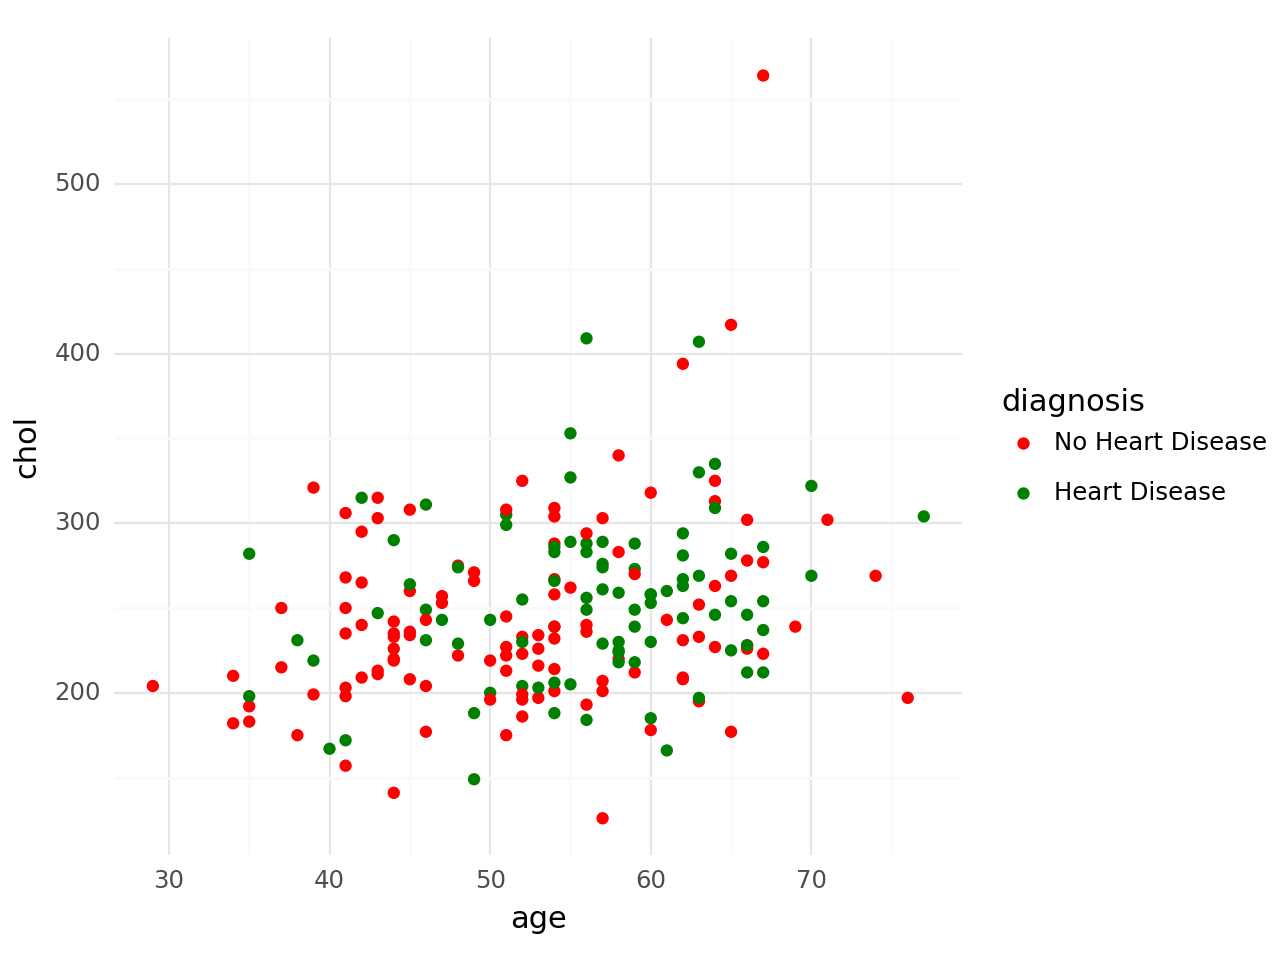

In [31]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
lr = LogisticRegression()
lr_pipeline = Pipeline([("lr", lr)])
fitted_pipeline_lr = lr_pipeline.fit(X, y_encoded)
lda = LinearDiscriminantAnalysis()
lda_pipeline = Pipeline([("lda", lda)])
fitted_pipeline_lda = lda_pipeline.fit(X, y_encoded)
svc = SVC(kernel="linear")
svc_pipeline = Pipeline([("svc", svc)])
fitted_pipeline_svc = svc_pipeline.fit(X, y_encoded)

plot_data = pd.DataFrame({"age": X["age"], "chol": X["chol"], "diagnosis": y, "lr_pred": fitted_pipeline_lr.predict(X),
                          "lda_pred": fitted_pipeline_lda.predict(X), "svc_pred": fitted_pipeline_svc.predict(X)})
p = (ggplot(plot_data, aes(x='age', y='chol', color='diagnosis')) +
     geom_point() +
     geom_abline(intercept=fitted_pipeline_lr.named_steps["lr"].intercept_[0],
                 slope=fitted_pipeline_lr.named_steps["lr"].coef_[0, 0],
                 linetype="dashed", color="blue") +
     geom_abline(intercept=fitted_pipeline_lda.named_steps["lda"].intercept_[0],
                 slope=fitted_pipeline_lda.named_steps["lda"].coef_[0, 0],
                 linetype="dashed", color="green") +
     geom_abline(intercept=fitted_pipeline_svc.named_steps["svc"].intercept_[0],
                 slope=fitted_pipeline_svc.named_steps["svc"].coef_[0, 0],
                 linetype="dashed", color="red") +
     scale_color_manual(values=["red", "green"], labels=["No Heart Disease", "Heart Disease"]) +
     theme_minimal())
print(p)